# Dataset marché des jeux vidéos dématérialisés : Playstation Store

Données réelles des jeux console ps5 disponibles sur le PlayStation Store sortie depuis le 10 novembre 2020 au 25 octobre 2025  (date de sortie de la console) pour la région Europe / France.

### Provenance

Dataset raw JSON généré via API (accès accordé dans le cadre du projet Alyra)

- GGDeals API: https://gg.deals/api/
- PlatPrices API:  https://platprices.com/developers.php

### Machine learning

 - **Machine learning : prédiction du délais avant baisse de prix d'un jeu**, peut servir pour les joueurs (faire des économies) et pour les professionnels du secteur (ajuster les prix par rapport à la concurrence).

    - On souhaite une baisse de prix interressante (au moins 25%, idéal 50%)


### Visualiser le fichier CSV en ligne

https://drive.google.com/file/d/11BltDe15yhO6tCkQnC9mR7u9jUQYyI95/view?usp=drive_link

### Résumé du dataset

- Jeux PS5 uniquement avec date de sortie à partir du 10/10/2020
- Jeux payant 
- Pas de DLC, uniquement des jeux complets



## Import librairies

In [307]:
import sys
from pathlib import Path
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
import locale
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

# Ajouter le dossier parent src au path
sys.path.append(os.path.abspath('..'))

%matplotlib inline


## CONSTANTES

In [308]:
EXTRACT_DATE = datetime(2025, 11, 1, 17, 2, 28)

## Chargement du dataset

In [309]:
# Fichier stocké temporairement sur un de mes S3
# url = "https://d3aok2axxchxf9.cloudfront.net/ia/games_data.csv"

url = os.path.join(Path.cwd().parent, "data/processed/games_data.csv")

# Charger les données CSV, Les colonnes Boolean sont au format Int64 (0,1,NaN)
df = pd.read_csv(url,dtype={
    'trophies_count': 'Int64',
    'local_multiplayer_max_players': 'Int64',
    'online_multiplayer_max_players': 'Int64',
    'difficulty': 'Int64',
    'download_size': 'Int64',
    'hours_main_story': 'Int64',
    'hours_completionist': 'Int64',
    'metacritic_critic_score': 'Int64',
    'metacritic_critic_userscore': 'Int64',
    'pegi_rating': 'Int64',
})


## EDA - Analyse exploratoire détaillée

- Les colonnes de prix sont en euros.

In [310]:
def column_summary(df:pd.DataFrame):
    summary = []
    for col in df.columns:
        col_type = df[col].dtype
        non_null = df[col].notna().sum()
        null_count = df[col].isna().sum()
        unique_count = df[col].nunique()

        summary.append({
            'Column': col,
            'Type': str(col_type),
            'Non-Null Count': non_null,
            'Null Count': null_count,
            'Unique Values': unique_count,
        })

    return pd.DataFrame(summary)

# Afficher le résumé des colonnes
print("=" * 80)
print("Résumé détaillé des colonnes:")
print("=" * 80)
column_summary_df = column_summary(df)
print(column_summary_df.to_string(index=False))
print("\n")

Résumé détaillé des colonnes:
                        Column    Type  Non-Null Count  Null Count  Unique Values
                     game_name  object            5382           0           5382
                      id_store  object            5382           0           5382
                short_url_name  object            5382           0           5382
                     publisher  object            5382           0           1083
                     developer  object            3920        1462           2709
                  release_date  object            5382           0           1347
         pssstore_stars_rating float64            5382           0            352
   pssstore_stars_rating_count   int64            5382           0           1583
       metacritic_critic_score   Int64            1268        4114             67
   metacritic_critic_userscore   Int64            1268        4114             10
                        genres  object            5360          22  

In [311]:
df.head()

,game_name,id_store,short_url_name,publisher,developer,release_date,pssstore_stars_rating,pssstore_stars_rating_count,metacritic_critic_score,metacritic_critic_userscore,...,hours_main_story,hours_completionist,pegi_rating,esrb_rating,rating_descriptions,voice_languages,subtitle_languages,base_price,lowest_price,price_history
0,"#Halloween, Super Puzzles Dream",EP8311-PPSA19174_00-0421646910657705,game-halloween-super-puzzles-dream-ps5,e-llusiontertainment,NaN,2023-10-30,1.57,14,<NA>,<NA>,...,<NA>,<NA>,7,Everyone,Fear/Horror,NaN,NaN,4.99,1.49,"[{""x"": ""2023-11-02"", ""y"": 4.99}, {""x"": ""2023-1..."
1,#SinucaAttack,EP2005-PPSA06055_00-SINUCA0000000000,game-sinucaattack-ps5,eastasiasoft,NaN,2022-05-19,3.26,72,<NA>,<NA>,...,0,0,3,Everyone,Fantasy Violence,NaN,NaN,4.99,1.49,"[{""x"": ""2022-05-21"", ""y"": 4.99}, {""x"": ""2022-1..."
2,"#Wish travel, super puzzle dreams",EP8311-PPSA16513_00-0233078860249892,game-wish-travel-super-puzzle-dreams-ps5,e-llusiontertainment,NaN,2023-05-31,1.55,11,<NA>,<NA>,...,<NA>,<NA>,3,Everyone,NaN,NaN,NaN,4.99,1.49,"[{""x"": ""2023-06-19"", ""y"": 4.99}, {""x"": ""2023-0..."
3,"#WomenUp, Super Puzzles Dream",EP8311-PPSA13840_00-0277389480637871,game-womenup-super-puzzles-dream-ps5,e-llusiontertainment,NaN,2023-01-26,1.44,18,<NA>,<NA>,...,<NA>,<NA>,3,Everyone,NaN,NaN,NaN,4.99,1.49,"[{""x"": ""2023-05-21"", ""y"": 4.99}, {""x"": ""2023-0..."
4,"#Xmas, Super Puzzles Dream",EP8311-PPSA12662_00-0212989199890961,game-xmas-super-puzzles-dream-ps5,e-llusiontertainment,NaN,2022-12-22,1.17,23,<NA>,<NA>,...,<NA>,<NA>,3,Everyone,NaN,NaN,NaN,4.99,1.49,"[{""x"": ""2023-01-23"", ""y"": 4.99}, {""x"": ""2023-0..."


In [312]:
df.describe()

,pssstore_stars_rating,pssstore_stars_rating_count,metacritic_critic_score,metacritic_critic_userscore,is_ps4,is_ps5,is_indie,is_dlc,is_vr,is_opti_ps5_pro,...,has_online_multiplayer,online_multiplayer_max_players,is_online_only,difficulty,download_size,hours_main_story,hours_completionist,pegi_rating,base_price,lowest_price
count,5382.000000,5.382000e+03,1268.0,1268.0,5382.000000,5382.0,5382.000000,5382.0,5382.000000,5382.000000,...,5382.000000,5382.0,5382.000000,2427.0,2528.0,3353.0,2905.0,4562.0,5382.000000,5382.000000
mean,3.862824,3.501787e+03,57.87224,59.124606,0.447046,1.0,0.423820,0.0,0.050353,0.028428,...,0.143627,1.196024,0.020810,3.416976,6334336842.530854,10.283925,11.456454,8.772907,18.526524,9.020821
std,0.691182,3.622325e+04,30.002306,20.191043,0.497234,0.0,0.494208,0.0,0.218693,0.166208,...,0.350744,6.523387,0.142761,2.614881,15086547791.580881,28.962312,44.02705,5.475559,16.451834,9.519553
min,0.000000,0.000000e+00,3.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,1.0,327679.0,0.0,0.0,3.0,1.190000,0.540000
25%,3.520000,3.100000e+01,45.75,50.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,2.0,225771520.0,1.0,1.0,3.0,5.990000,2.490000
50%,4.000000,8.800000e+01,71.0,60.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,3.0,886177792.0,5.0,5.0,7.0,14.990000,5.990000
75%,4.360000,4.610000e+02,79.0,70.0,1.000000,1.0,1.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,4.0,4170399744.0,11.0,12.0,12.0,24.990000,11.990000
max,5.000000,1.825682e+06,96.0,90.0,1.000000,1.0,1.000000,0.0,1.000000,1.000000,...,1.000000,99.0,1.000000,11.0,147972947968.0,1000.0,1500.0,18.0,94.990000,79.990000


### Plots utils

In [313]:
def draw_binary_circular_plots(data: list, name: str, axe: plt.Axes):
    colors = sns.color_palette("crest")
    values = [item["value"] for item in data]
    labels = [item["label"] for item in data]

    wedges, texts, autotexts = axe.pie(
        values,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=90,
        shadow=False,
    )

    for autotext in autotexts:
        autotext.set_color("white")
        autotext.set_fontweight("bold")

    axe.set_title(f"{name}", fontweight="bold", pad=20)
    
    
def layout_plots(n_cols: int):
    # Calculer le nombre de lignes nécessaires
    actual_rows = (n_cols + 2) // 3  # 3 colonnes par ligne

    # Limiter à 3 colonnes maximum
    actual_cols = min(n_cols, 3)

    # Créer la figure avec plus d'espace vertical
    fig, axes = plt.subplots(
        actual_rows, 
        actual_cols, 
        figsize=(12, 5 * actual_rows),  # Hauteur dynamique selon le nombre de lignes
        gridspec_kw={'hspace': 0.5, 'wspace': 0.3}  # ← Espace entre les lignes/colonnes
    )

    # Normaliser axes pour toujours retourner un tableau 1D itérable
    if n_cols == 1:
        axes = [axes]
    elif actual_rows == 1 and actual_cols == 1:
        axes = [axes]
    elif actual_rows == 1:
        axes = list(axes)
    else:
        axes = list(axes.flatten())

    return fig, axes

def generate_multi_str_col_top_proportion_data(
    df: pd.DataFrame, col_name: str, top_count: int
):

    # Séparer les genres et exploser
    genres_exploded = df[col_name].str.split(",").explode()
    genres_exploded = genres_exploded.str.strip()
    genre_counts = genres_exploded.value_counts()

    # Garder le top 6 et regrouper le reste dans "Autres"
    top_val = genre_counts.head(top_count)
    autres = genre_counts.iloc[top_count:].sum()

    # Créer les données finales
    if autres > 0:
        final_counts = pd.concat([top_val, pd.Series({"Autres": autres})])
    else:
        final_counts = top_val

    result = []
    for label, value in final_counts.items():
        result.append(
            {
                "label": label,
                "value": value,
            }
        )

    return result

### Analyse des données historique de prix

In [314]:
# Convertir la colonne price_history de string vers list
df['price_history'] = df['price_history'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x
)

def analyze_price_history(df):
    """Analyse complète de l'historique des prix"""
    
    print("=" * 80)
    print("ANALYSE DE L'HISTORIQUE DES PRIX (price_history)")
    print("=" * 80)
    
    # 1. DATE LA PLUS ANCIENNE
    print("\n📅 DATES D'ENREGISTREMENT:")
    
    def get_oldest_date(price_history):
        if not price_history or len(price_history) == 0:
            return None
        try:
            dates = [datetime.strptime(entry['x'], "%Y-%m-%d") for entry in price_history]
            return min(dates) if dates else None
        except:
            return None
    
    def get_newest_date(price_history):
        if not price_history or len(price_history) == 0:
            return None
        try:
            dates = [datetime.strptime(entry['x'], "%Y-%m-%d") for entry in price_history]
            return max(dates) if dates else None
        except:
            return None
    
    df['oldest_price_date'] = df['price_history'].apply(get_oldest_date)
    df['newest_price_date'] = df['price_history'].apply(get_newest_date)
    
    oldest_global = df['oldest_price_date'].min()
    newest_global = df['newest_price_date'].max()
    
    print(f"  Date la plus ancienne : {oldest_global}")
    print(f"  Date la plus récente : {newest_global}")
    if oldest_global and newest_global:
        print(f"  Période de collecte : {(newest_global - oldest_global).days} jours")
    
    # 2. NOMBRE D'ENTRÉES PAR JEU
    print("\n📊 NOMBRE D'ENTRÉES PRIX PAR JEU:")
    
    df['price_history_count'] = df['price_history'].apply(
        lambda x: len(x) if isinstance(x, list) else 0
    )
    
    print(f"  Moyenne : {df['price_history_count'].mean():.1f} entrées")
    print(f"  Médiane : {df['price_history_count'].median():.0f} entrées")
    print(f"  Min : {df['price_history_count'].min()} entrées")
    print(f"  Max : {df['price_history_count'].max()} entrées")
    print(f"  Jeux sans historique : {(df['price_history_count'] == 0).sum()}")
    
    # 3. NOMBRE DE BAISSES DE PRIX
    print("\n💰 NOMBRE DE BAISSES DE PRIX PAR JEU:")
    
    def count_price_drops(price_history):
        """Compte le nombre de fois où le prix baisse"""
        if not price_history or len(price_history) < 2:
            return 0
        
        try:
            # Trier par date
            sorted_history = sorted(price_history, key=lambda x: x['x'])
            prices = [entry['y'] for entry in sorted_history if entry['y'] >= 0.1]
            
            if len(prices) < 2:
                return 0
            
            # Compter les baisses
            drops = 0
            for i in range(1, len(prices)):
                if prices[i] < prices[i-1]:
                    drops += 1
            
            return drops
        except:
            return 0
    
    df['price_drops_count'] = df['price_history'].apply(count_price_drops)
    
    print(f"  Moyenne : {df['price_drops_count'].mean():.1f} baisses")
    print(f"  Médiane : {df['price_drops_count'].median():.0f} baisses")
    print(f"  Max : {df['price_drops_count'].max()} baisses")
    print(f"  Jeux sans baisse : {(df['price_drops_count'] == 0).sum()} ({(df['price_drops_count'] == 0).sum()/len(df)*100:.1f}%)")
    print(f"  Jeux avec 1+ baisse : {(df['price_drops_count'] > 0).sum()} ({(df['price_drops_count'] > 0).sum()/len(df)*100:.1f}%)")
    
    # 4. AMPLITUDE DES VARIATIONS DE PRIX
    print("\n📈 AMPLITUDE DES VARIATIONS:")
    
    def get_price_range(price_history):
        """Calcule la différence entre prix max et min"""
        if not price_history or len(price_history) == 0:
            return None
        try:
            prices = [entry['y'] for entry in price_history if entry['y'] >= 0.1]
            if not prices:
                return None
            return max(prices) - min(prices)
        except:
            return None
    
    def get_max_discount_percent(price_history, base_price):
        """Calcule la réduction maximale en %"""
        if not price_history or len(price_history) == 0 or not base_price or base_price <= 0:
            return None
        try:
            prices = [entry['y'] for entry in price_history if entry['y'] >= 0.1]
            if not prices:
                return None
            min_price = min(prices)
            return ((base_price - min_price) / base_price) * 100
        except:
            return None
    
    df['price_range'] = df['price_history'].apply(get_price_range)
    df['max_discount_percent'] = df.apply(
        lambda row: get_max_discount_percent(row['price_history'], row['base_price']),
        axis=1
    )
    
    print(f"  Amplitude moyenne : {df['price_range'].mean():.2f}€")
    print(f"  Amplitude médiane : {df['price_range'].median():.2f}€")
    print(f"  Réduction max moyenne : {df['max_discount_percent'].mean():.1f}%")
    print(f"  Réduction max médiane : {df['max_discount_percent'].median():.1f}%")
    
    # 5. FRÉQUENCE DE MISE À JOUR
    print("\n⏱️ FRÉQUENCE DE MISE À JOUR:")
    
    def get_avg_days_between_updates(price_history):
        """Calcule le nombre moyen de jours entre deux entrées"""
        if not price_history or len(price_history) < 2:
            return None
        try:
            dates = sorted([datetime.strptime(entry['x'], "%Y-%m-%d") for entry in price_history])
            if len(dates) < 2:
                return None
            
            intervals = [(dates[i+1] - dates[i]).days for i in range(len(dates)-1)]
            return sum(intervals) / len(intervals) if intervals else None
        except:
            return None
    
    df['avg_days_between_updates'] = df['price_history'].apply(get_avg_days_between_updates)
    
    print(f"  Intervalle moyen : {df['avg_days_between_updates'].mean():.1f} jours")
    print(f"  Intervalle médian : {df['avg_days_between_updates'].median():.1f} jours")
    
    # 6. QUALITÉ DES DONNÉES
    print("\n✅ QUALITÉ DES DONNÉES:")
    
    def has_valid_data(price_history):
        """Vérifie si l'historique contient des données valides"""
        if not price_history or len(price_history) == 0:
            return False
        try:
            for entry in price_history:
                if 'x' not in entry or 'y' not in entry:
                    return False
                if entry['y'] < 0:
                    return False
            return True
        except:
            return False
    
    df['has_valid_price_history'] = df['price_history'].apply(has_valid_data)
    
    valid_count = df['has_valid_price_history'].sum()
    print(f"  Jeux avec données valides : {valid_count} / {len(df)} ({valid_count/len(df)*100:.1f}%)")
    print(f"  Jeux avec données manquantes/invalides : {len(df) - valid_count} ({(len(df)-valid_count)/len(df)*100:.1f}%)")
    
    # 7. PRIX SUSPECTS
    print("\n⚠️ ANOMALIES DÉTECTÉES:")
    
    def has_zero_prices(price_history):
        if not price_history:
            return False
        return any(entry['y'] == 0 for entry in price_history)
    
    def has_negative_prices(price_history):
        if not price_history:
            return False
        return any(entry['y'] < 0 for entry in price_history)
    
    zero_prices = df['price_history'].apply(has_zero_prices).sum()
    negative_prices = df['price_history'].apply(has_negative_prices).sum()
    
    print(f"  Jeux avec prix à 0€ : {zero_prices}")
    print(f"  Jeux avec prix négatifs : {negative_prices}")
    
    return df

# Lancer l'analyse
df = analyze_price_history(df)

ANALYSE DE L'HISTORIQUE DES PRIX (price_history)

📅 DATES D'ENREGISTREMENT:
  Date la plus ancienne : 2020-11-11 00:00:00
  Date la plus récente : 2025-10-29 00:00:00
  Période de collecte : 1813 jours

📊 NOMBRE D'ENTRÉES PRIX PAR JEU:
  Moyenne : 28.8 entrées
  Médiane : 26 entrées
  Min : 1 entrées
  Max : 129 entrées
  Jeux sans historique : 0

💰 NOMBRE DE BAISSES DE PRIX PAR JEU:
  Moyenne : 8.9 baisses
  Médiane : 7 baisses
  Max : 62 baisses
  Jeux sans baisse : 579 (10.8%)
  Jeux avec 1+ baisse : 4803 (89.2%)

📈 AMPLITUDE DES VARIATIONS:
  Amplitude moyenne : 10.58€
  Amplitude médiane : 6.00€
  Réduction max moyenne : 47.8%
  Réduction max médiane : 50.0%

⏱️ FRÉQUENCE DE MISE À JOUR:
  Intervalle moyen : 36.7 jours
  Intervalle médian : 24.6 jours

✅ QUALITÉ DES DONNÉES:
  Jeux avec données valides : 5382 / 5382 (100.0%)
  Jeux avec données manquantes/invalides : 0 (0.0%)

⚠️ ANOMALIES DÉTECTÉES:
  Jeux avec prix à 0€ : 0
  Jeux avec prix négatifs : 0


### Analyse des dates de sorties

ANALYSE DES DATES DE SORTIE

📅 PÉRIODE COUVERTE:
  Date la plus ancienne : 2020-11-11
  Date la plus récente : 2025-10-23
  Période totale : 1807 jours (5.0 ans)
  Dates manquantes : 0 / 5382 (0.0%)

⏳ ANCIENNETÉ DES JEUX:
  Ancienneté moyenne : 700 jours (1.9 ans)
  Ancienneté médiane : 624 jours (1.7 ans)
  Jeu le plus ancien : 1828 jours (5.0 ans)
  Jeu le plus récent : 21 jours (0.1 ans)

🆕 SORTIES RÉCENTES:
  Derniers 30 jours : 21 jeux (0.4%)
  Derniers 90 jours : 235 jeux (4.4%)
  Derniers 6 mois : 625 jeux (11.6%)
  Dernière année : 1494 jeux (27.8%)

👴 JEUX ANCIENS:
  Plus de 2 ans : 2330 jeux (43.3%)
  Plus de 5 ans : 18 jeux (0.3%)
  Plus de 10 ans : 0 jeux (0.0%)


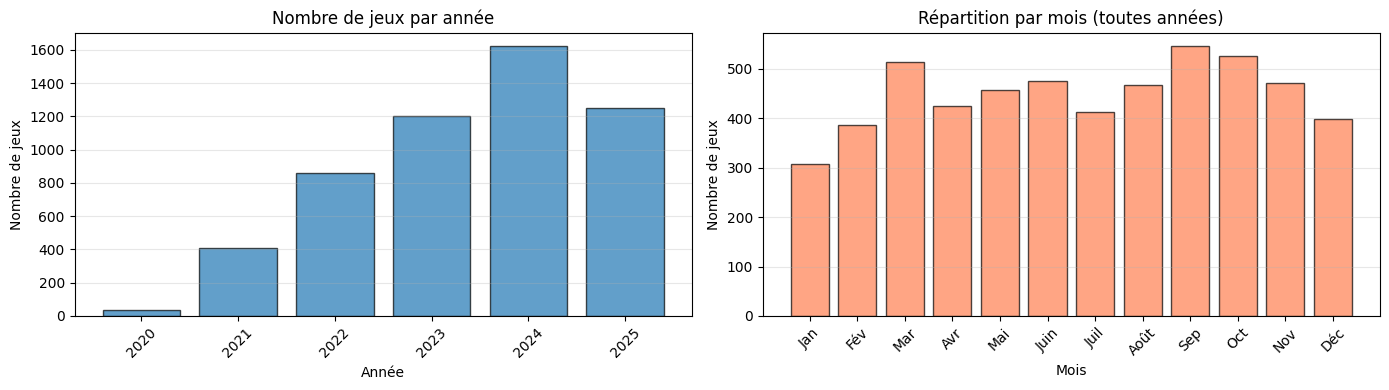

In [315]:
def analyze_release_dates(df):
    print("=" * 80)
    print("ANALYSE DES DATES DE SORTIE")
    print("=" * 80)
    
    # Convertir en datetime si nécessaire
    df['release_date_dt'] = pd.to_datetime(df['release_date'], errors='coerce')
    today = datetime.now()
    
    # 1. STATISTIQUES GÉNÉRALES
    print("\n📅 PÉRIODE COUVERTE:")
    
    oldest_release = df['release_date_dt'].min()
    newest_release = df['release_date_dt'].max()
    missing_dates = df['release_date_dt'].isna().sum()
    
    print(f"  Date la plus ancienne : {oldest_release.strftime('%Y-%m-%d') if pd.notna(oldest_release) else 'N/A'}")
    print(f"  Date la plus récente : {newest_release.strftime('%Y-%m-%d') if pd.notna(newest_release) else 'N/A'}")
    
    if pd.notna(oldest_release) and pd.notna(newest_release):
        print(f"  Période totale : {(newest_release - oldest_release).days} jours ({(newest_release - oldest_release).days/365:.1f} ans)")
        
    print(f"  Dates manquantes : {missing_dates} / {len(df)} ({missing_dates/len(df)*100:.1f}%)")
    
    # 2. ANCIENNETÉ DES JEUX
    print("\n⏳ ANCIENNETÉ DES JEUX:")
    
    df['days_since_release'] = (today - df['release_date_dt']).dt.days
    df['years_since_release'] = df['days_since_release'] / 365.25
    
    print(f"  Ancienneté moyenne : {df['days_since_release'].mean():.0f} jours ({df['years_since_release'].mean():.1f} ans)")
    print(f"  Ancienneté médiane : {df['days_since_release'].median():.0f} jours ({df['years_since_release'].median():.1f} ans)")
    print(f"  Jeu le plus ancien : {df['days_since_release'].max():.0f} jours ({df['years_since_release'].max():.1f} ans)")
    print(f"  Jeu le plus récent : {df['days_since_release'].min():.0f} jours ({df['years_since_release'].min():.1f} ans)")

    # 6. SORTIES RÉCENTES
    print("\n🆕 SORTIES RÉCENTES:")
    
    last_30_days = (df['days_since_release'] <= 30).sum()
    last_90_days = (df['days_since_release'] <= 90).sum()
    last_180_days = (df['days_since_release'] <= 180).sum()
    last_365_days = (df['days_since_release'] <= 365).sum()
    
    print(f"  Derniers 30 jours : {last_30_days} jeux ({last_30_days/len(df)*100:.1f}%)")
    print(f"  Derniers 90 jours : {last_90_days} jeux ({last_90_days/len(df)*100:.1f}%)")
    print(f"  Derniers 6 mois : {last_180_days} jeux ({last_180_days/len(df)*100:.1f}%)")
    print(f"  Dernière année : {last_365_days} jeux ({last_365_days/len(df)*100:.1f}%)")
    
    # 7. JEUX ANCIENS
    print("\n👴 JEUX ANCIENS:")
    
    older_2_years = (df['years_since_release'] >= 2).sum()
    older_5_years = (df['years_since_release'] >= 5).sum()
    older_10_years = (df['years_since_release'] >= 10).sum()
    
    print(f"  Plus de 2 ans : {older_2_years} jeux ({older_2_years/len(df)*100:.1f}%)")
    print(f"  Plus de 5 ans : {older_5_years} jeux ({older_5_years/len(df)*100:.1f}%)")
    print(f"  Plus de 10 ans : {older_10_years} jeux ({older_10_years/len(df)*100:.1f}%)")
    
    df['release_year'] = df['release_date_dt'].dt.year
    df['release_month'] = df['release_date_dt'].dt.month
    
    return df

# Lancer l'analyse
df = analyze_release_dates(df)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 4))
ax1: plt.Axes
ax2: plt.Axes

# Distribution des années
year_counts = df['release_year'].value_counts().sort_index()

ax1.bar(year_counts.index, year_counts.values, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre de jeux')
ax1.set_title('Nombre de jeux par année')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3, axis='y')

# Distribution par mois (toutes années confondues)
month_counts = df['release_month'].value_counts().sort_index()
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
ax2.bar(range(1, 13), [month_counts.get(i, 0) for i in range(1, 13)], 
               edgecolor='black', alpha=0.7, color='coral')
ax2.set_xlabel('Mois')
ax2.set_ylabel('Nombre de jeux')
ax2.set_title('Répartition par mois (toutes années)')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names, rotation=45)
ax2.grid(alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

### Distribution des colonnes catégorielles

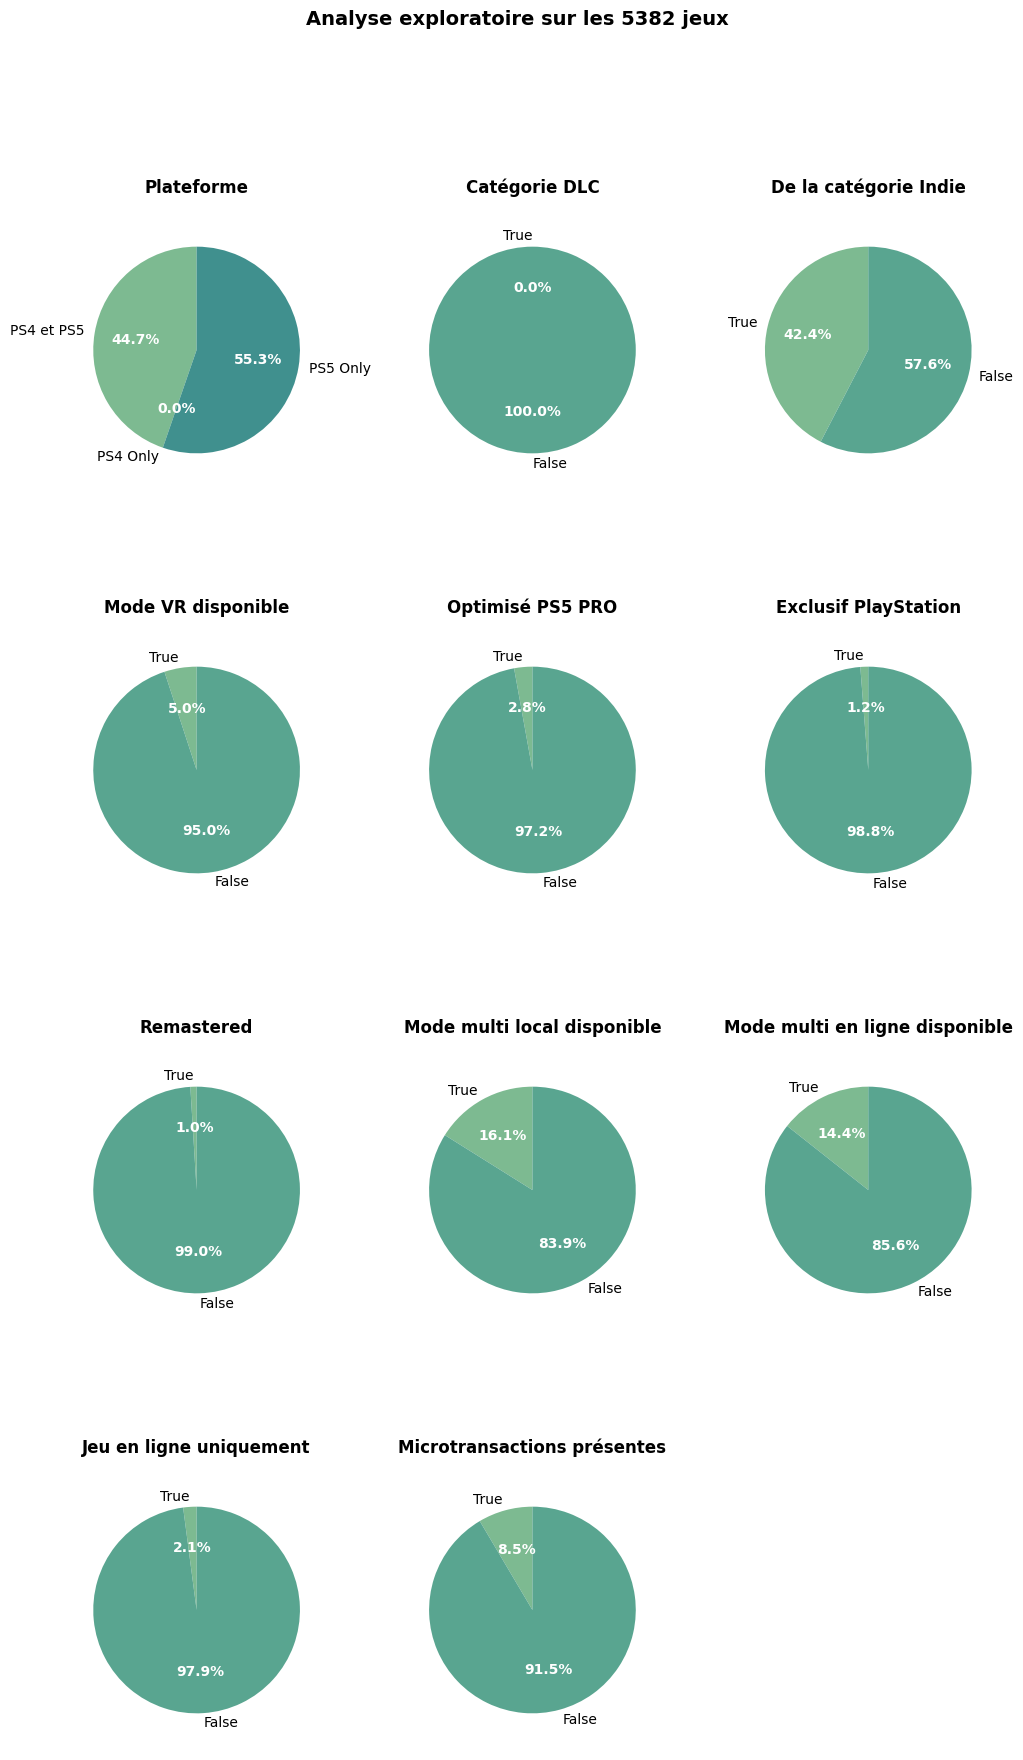

In [316]:
def generate_platform_proportion_data(df: pd.DataFrame):
    result = [
        {
            "label": "PS4 et PS5",
            "value": ((df["is_ps4"] == 1) & (df["is_ps5"] == 1)).sum(),
        },
        {
            "label": "PS4 Only",
            "value": ((df["is_ps4"] == 1) & (df["is_ps5"] == 0)).sum(),
        },
        {
            "label": "PS5 Only",
            "value": ((df["is_ps4"] == 0) & (df["is_ps5"] == 1)).sum(),
        },
    ]

    return result

def generate_binary_cols_proportion_data(df: pd.DataFrame, column_name: str):
    binary_cols = [col for col in df.columns if col == column_name]

    if len(binary_cols) == 0:
        return None

    result = [
        {
            "label": "True",
            "value": (
                (df[binary_cols[0]] == 1).sum() / len(df) * 100 if len(df) > 0 else 0
            ),
        },
        {
            "label": "False",
            "value": (
                (df[binary_cols[0]] == 0).sum() / len(df) * 100 if len(df) > 0 else 0
            ),
        },
    ]

    return result


def generate_proportion_analyse_plot(df: pd.DataFrame):
    data_plateform = generate_platform_proportion_data(df)
    
    list_cols_true_false = [
        {"col": "is_dlc", "title": "Catégorie DLC"},
        {"col": "is_indie", "title": "De la catégorie Indie"},
        {"col": "is_vr", "title": "Mode VR disponible"},
        {"col": "is_opti_ps5_pro", "title": "Optimisé PS5 PRO"},
        {"col": "is_ps_exclusive", "title": "Exclusif PlayStation"},
        {"col": "is_remaster", "title": "Remastered"},
        {"col": "has_local_multiplayer", "title": "Mode multi local disponible"},
        {"col": "has_online_multiplayer", "title": "Mode multi en ligne disponible"},
        {"col": "is_online_only", "title": "Jeu en ligne uniquement"},
        {"col": "has_microtransactions", "title": "Microtransactions présentes"},
    ]

    fig, axes = layout_plots(11)

    draw_binary_circular_plots(data_plateform, "Plateforme", axes[0])

    cpt = 1
    for col_plt in list_cols_true_false:
        data_plt = generate_binary_cols_proportion_data(df, col_plt["col"])
        if data_plt is not None:
            draw_binary_circular_plots(data_plt, col_plt["title"], axes[cpt])
            cpt += 1

    for j in range(cpt, len(axes)):
        axes[j].axis("off")
        
    fig.suptitle(
        f"Analyse exploratoire sur les {len(df)} jeux",
        fontsize=14,
        fontweight="bold",
    )
    plt.show()
    
generate_proportion_analyse_plot(df)

### Distribution des prix

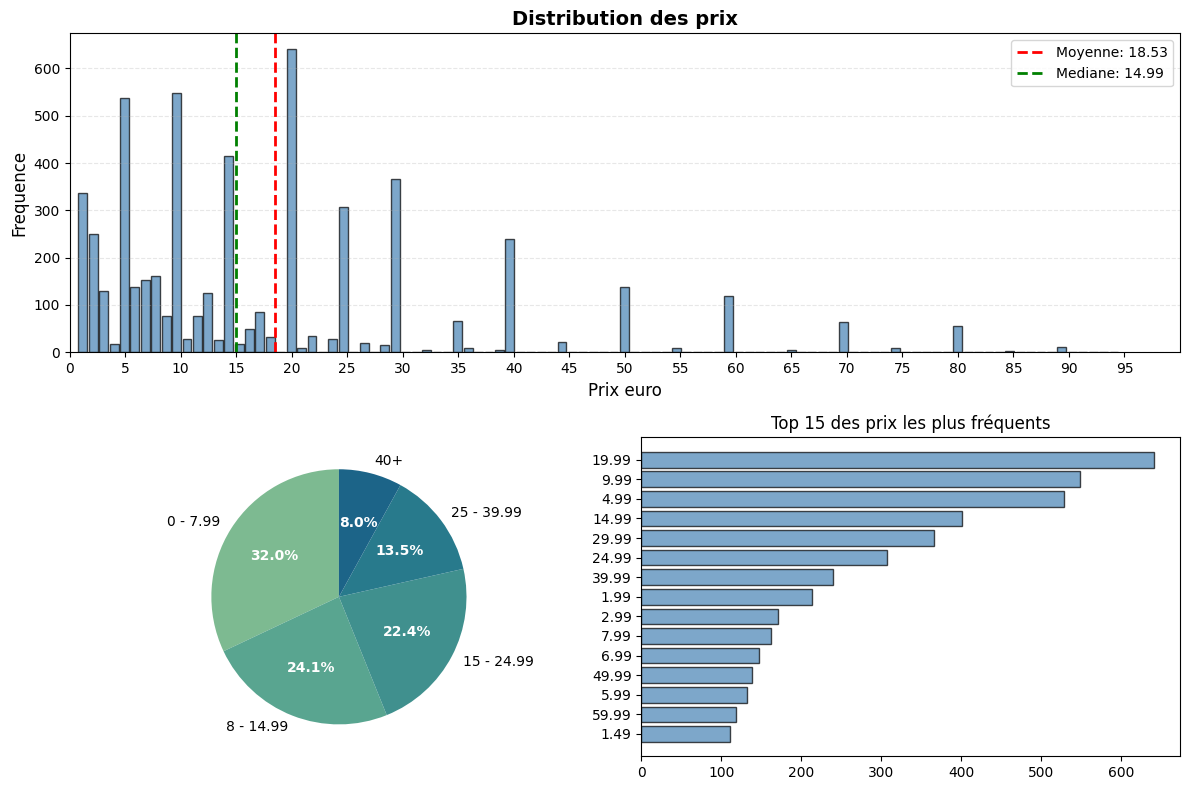

In [317]:
PRICE_SEGMENTS = [
    {
        "label": "0 - 7.99",
        "value_min": 0,
        "value_max": 7.99,
    },
    {
        "label": "8 - 14.99",
        "value_min": 8,
        "value_max": 14.99,
    },
    {
        "label": "15 - 24.99",
        "value_min": 15,
        "value_max": 24.99,
    },
    {
        "label": "25 - 39.99",
        "value_min": 25,
        "value_max": 39.99,
    },
    {
        "label": "40+",
        "value_min": 40,
        "value_max": 150,
    },
]

def generate_base_price_proportion_data(df: pd.DataFrame):
    result = []
    for seg in PRICE_SEGMENTS:
        result.append(
            {
                "label": seg["label"],
                "value": (
                    (df["base_price"] >= seg["value_min"])
                    & (df["base_price"] <= seg["value_max"])
                ).sum(),
            }
        )

    return result

def histogram_base_price_frequence(df: pd.DataFrame, axe: plt.Axes):

    counts, bin_edges = np.histogram(df["base_price"], bins=100)
    
    axe.bar(
        bin_edges[:-1],  # Utiliser les bords gauches (sans le dernier)
        counts,
        color="steelblue",
        edgecolor="black",
        alpha=0.7,
        align="center",
    )

    axe.set_xlabel("Prix euro", fontsize=12)
    axe.set_ylabel("Frequence", fontsize=12)
    axe.set_title("Distribution des prix", fontsize=14, fontweight="bold")
    axe.grid(axis="y", alpha=0.3, linestyle="--")
    axe.set_xticks(range(0, 100, 5))
    axe.set_xlim(0, 100)

    # Afficher des statistiques
    mean_price = df["base_price"].mean()
    median_price = df["base_price"].median()

    axe.axvline(
        mean_price,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Moyenne: {mean_price:.2f}",
    )
    axe.axvline(
        median_price,
        color="green",
        linestyle="--",
        linewidth=2,
        label=f"Mediane: {median_price:.2f}",
    )
    axe.legend()


def histogram_base_price_unique_count(df: pd.DataFrame, axe: plt.Axes):
    price_counts = df["base_price"].value_counts().sort_index()
    axe.barh(price_counts.index, price_counts.values)
    axe.set_title("Frequence des prix uniques", fontsize=14)
    axe.set_xlabel("Frequence", fontsize=12)
    axe.set_ylabel("Prix", fontsize=12)
    axe.grid(axis="x", alpha=0.3)

def histogram_base_price_unique_count_top(df: pd.DataFrame, axe: plt.Axes):
    # Compter les occurrences et prendre les plus fréquents
    top = df["base_price"].value_counts().head(15).sort_values()

    axe.barh(  # barh au lieu de bar pour horizontal
        range(len(top)),  # Positions sur l'axe y
        top.values,  # Fréquences sur l'axe x
        color="steelblue",
        edgecolor="black",
        alpha=0.7,
    )

    # Configurer les étiquettes de l'axe y avec les valeurs de base_price
    axe.set_yticks(range(len(top)))
    axe.set_yticklabels(top.index)
    axe.set_title("Top 15 des prix les plus fréquents")


def prices_distribution(df: pd.DataFrame, save_file=False):

    fig = plt.figure(figsize=(12, 8))

    # Première ligne : 1 graphique qui prend toute la largeur
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)

    # Deuxième ligne : 2 graphiques
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    ax3 = plt.subplot2grid((2, 2), (1, 1))

    histogram_base_price_frequence(df, ax1)

    data_price = generate_base_price_proportion_data(df)
    draw_binary_circular_plots(data_price, "", ax2)

    histogram_base_price_unique_count_top(df, ax3)

    plt.tight_layout()
    plt.show()

prices_distribution(df)

### Distribution des genres

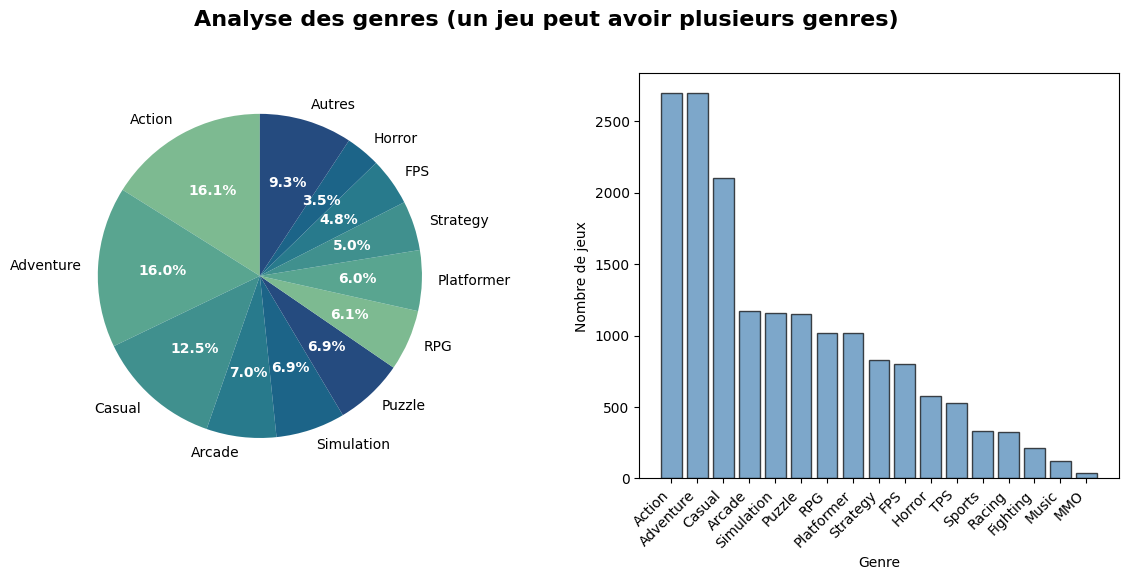

In [318]:
def histogram_genres_count(df: pd.DataFrame, axe: plt.Axes):

    # Séparer les genres et exploser
    genres_exploded = df["genres"].str.split(",").explode()
    genres_exploded = genres_exploded.str.strip()
    genre_counts = genres_exploded.value_counts()

    axe.bar(
        range(len(genre_counts)),
        genre_counts.values,
        color="steelblue",
        edgecolor="black",
        alpha=0.7,
    )

    axe.set_xticks(range(len(genre_counts)))
    axe.set_xticklabels(genre_counts.index, rotation=45, ha="right")

    axe.set_xlabel("Genre")
    axe.set_ylabel("Nombre de jeux")


def genres_distribution(df: pd.DataFrame, save_file=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1: plt.Axes
    ax2: plt.Axes

    data = generate_multi_str_col_top_proportion_data(df, "genres", top_count=11)
    draw_binary_circular_plots(
        data,
        "",
        ax1,
    )

    histogram_genres_count(df, ax2)

    fig.suptitle(
        "Analyse des genres (un jeu peut avoir plusieurs genres)",
        fontsize=16,
        fontweight="bold",
    )

    plt.tight_layout(pad=2.0)
    plt.show()

genres_distribution(df)

## PREPROCESSING ET FEATURE ENGINEERING

### Retour métier des consultants sur la prédiction du nombre de jours avant baisse de prix

- **Temporalité de sortie concurrentes :** C'est une feature que je pourrai peut être extraire du dataset (pour une fenêtre de date commune, lister le nombre de jeux avec même genre et de de niveau AAA) . Mais une analyse humaine semble importante.

- **Prix peut baisser plus rapidement s’il s’agit d’un Remastered:** c'est une information que je peux retrouver dans le nom du jeu.

- **Les jeux dont le succès à une incidence sur la pérénité du studio:** C'est une feature que je vais intégrer dans ma prédiction, pour un jeu avoir l'information si le studio de developpement et l'éditeur sont important dans l'industrie:

  - MAJEURE (SONY, CAPCOM, UBISOFT etc)
  - ACTIF (nombre de jeux > 3 par exemple)
  - AUTRES

- **Cycle console:** jeux sortie au debut, milieu ou fin de vie de la console
  - C'est une feature que je peux déduire des données et intégrer (en fonction de la date de sortie de la console PS4 et sortie PS5)

- **Nombre de DLCs:** La sortie d'une extension va forcement avoir une incidence sur le prix du jeu de base
  - Le nombre de DLCs sortie est présent dans les données
  - Je pourrai trouver les dates de sortie d'une extension d'un jeu si j'avais plus de temps de developpement.

- **Le jeu contient-il des microtransactions:** Achat in game rentable on peut se permettre de baisser le prix du jeu de base rapidement
  - Le nombre de microtransactions disponible à l'achat pour un jeu est présent dans les données

- **Fait-il parti d'une série de suite:** Typiquement les jeux de sport annuelle
  - Le nombre de jeux faisant partis de la même série est présent dans les données. (FIFA 2022 - FIFA 2023 etc.)

- **Exclusivité ps5** Le prix aura tendance à moins baisser (il faut que le jeu soit rentable, on peut pas se rattraper sur les ventes des jeux des autres consoles / pc)
  - L'information est présente dans les données

### Création features

Transformation des dates en nombre de jours avant réduction

In [319]:
def days_until_first_discount(
    sales_history, base_price, release_date, discount_threshold=0
):
    if release_date is None:
        return None

    if len(sales_history) == 0:
        return None

    if not isinstance(base_price, (int, float)):
        return None

    # Convertir release_date en datetime si c'est une string
    if isinstance(release_date, str):
        release_date = datetime.strptime(release_date, "%Y-%m-%d")

    # Calculer le prix cible selon le seuil de réduction
    target_price = base_price * (1 - discount_threshold / 100)

    # Parcourir l'historique pour trouver la première baisse atteignant le seuil
    for entry in sales_history:
        price = entry["y"]
        date_str = entry["x"]
        date = datetime.strptime(date_str, "%Y-%m-%d")

        # Ignorer les prix négatifs
        if price < 0.1:
            continue

        # Vérifier si la réduction atteint le seuil et après la date de sortie
        if price <= target_price and date >= release_date:
            days_diff = (date - release_date).days
            return days_diff

    # Aucune baisse au seuil voulu trouvée
    return None

promos = [10,25,50,75]

for promo in promos:
    col_name = f'days_to_{promo}_percent_discount'
    df[col_name] = df.apply(
        lambda row: days_until_first_discount(
            row['price_history'], 
            row['base_price'], 
            row['release_date'], 
            promo
        ),
        axis=1
    )
    
# Calculer l'ancienneté de chaque jeu
df['release_date_dt'] = pd.to_datetime(df['release_date'])

df['days_since_release'] = (EXTRACT_DATE - df['release_date_dt']).dt.days

# Afficher un résumé des nouvelles colonnes
new_cols = [f'days_to_{p}_percent_discount' for p in promos]
new_cols += ['days_since_release']

print(df[new_cols].describe())


       days_to_10_percent_discount  days_to_25_percent_discount  \
count                  4778.000000                  4509.000000   
mean                    111.046463                   139.444666   
std                     114.792521                   130.566226   
min                       0.000000                     0.000000   
25%                      48.000000                    57.000000   
50%                      76.000000                    98.000000   
75%                     128.000000                   175.000000   
max                    1292.000000                  1292.000000   

       days_to_50_percent_discount  days_to_75_percent_discount  \
count                  3091.000000                  1025.000000   
mean                    290.918149                   519.724878   
std                     207.714124                   324.242354   
min                       0.000000                     1.000000   
25%                     142.000000                   266.0000

### Analyse des résultats

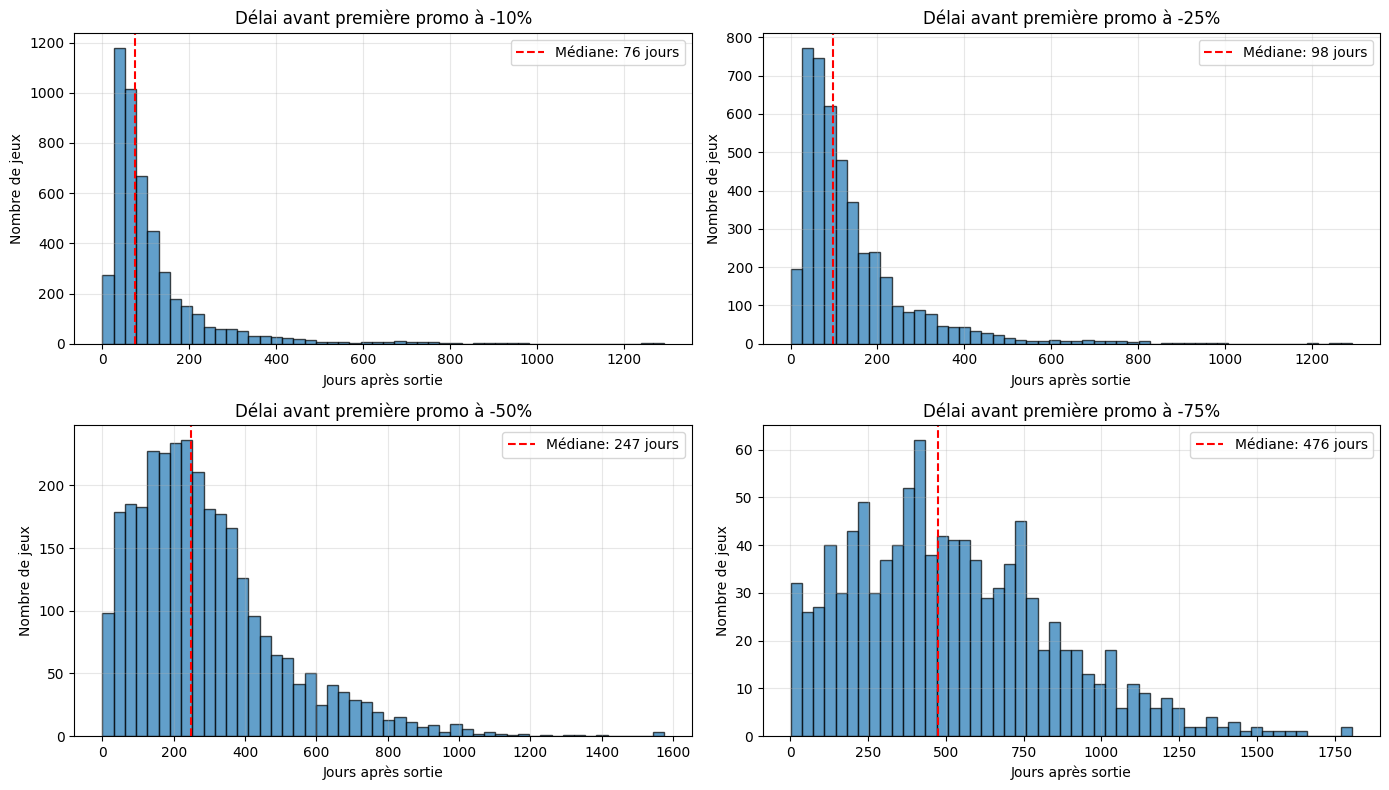


RÉSUMÉ DES PROMOTIONS
Réduction  Jeux concernés Pourcentage  Médiane (jours)  Moyenne (jours)  Min (jours)  Max (jours)
     -10%            4778       88.8%             76.0       111.046463          0.0       1292.0
     -25%            4509       83.8%             98.0       139.444666          0.0       1292.0
     -50%            3091       57.4%            247.0       290.918149          0.0       1574.0
     -75%            1025       19.0%            476.0       519.724878          1.0       1806.0


In [320]:
# Créer un graphique pour chaque seuil de promo
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for idx, promo in enumerate(promos):
    col = f'days_to_{promo}_percent_discount'
    data = df[col].dropna()
    
    ax = axes[idx]
    
    ax : plt.Axes
    
    ax.hist(data, bins=50, edgecolor='black', alpha=0.7)
    ax.axvline(data.median(), color='red', linestyle='--', 
                      label=f'Médiane: {data.median():.0f} jours')
    ax.set_xlabel('Jours après sortie')
    ax.set_ylabel('Nombre de jeux')
    ax.set_title(f'Délai avant première promo à -{promo}%')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


summary_data = []
for promo in promos:
    col = f'days_to_{promo}_percent_discount'
    summary_data.append({
        'Réduction': f'-{promo}%',
        'Jeux concernés': df[col].notna().sum(),
        'Pourcentage': f"{(df[col].notna().sum() / len(df)) * 100:.1f}%",
        'Médiane (jours)': df[col].median(),
        'Moyenne (jours)': df[col].mean(),
        'Min (jours)': df[col].min(),
        'Max (jours)': df[col].max()
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("RÉSUMÉ DES PROMOTIONS")
print("="*80)
print(summary_df.to_string(index=False))

### Analyse des jeux sans promotions

In [321]:
# Jeux n'ayant JAMAIS eu de réduction (même pas 10%)
no_discount_ever = df[df['days_to_10_percent_discount'].isna()].copy()

print("=" * 80)
print("JEUX SANS RÉDUCTION")
print("=" * 80)
print(f"\n📊 Total de jeux sans réduction : {len(no_discount_ever)} / {len(df)} ({len(no_discount_ever)/len(df)*100:.1f}%)")


print("\n" + "=" * 80)
print("STATISTIQUES DES JEUX SANS RÉDUCTION")
print("=" * 80)

# Prix
print("\n💰 PRIX:")
print(f"  Prix moyen : {no_discount_ever['base_price'].mean():.2f}€")
print(f"  Prix médian : {no_discount_ever['base_price'].median():.2f}€")
print(f"  Prix min : {no_discount_ever['base_price'].min():.2f}€")
print(f"  Prix max : {no_discount_ever['base_price'].max():.2f}€")

# Comparaison avec les jeux ayant eu des réductions
with_discount = df[df['days_to_10_percent_discount'].notna()]
print(f"\n  💡 Prix moyen (avec réduction) : {with_discount['base_price'].mean():.2f}€")
print(f"  💡 Différence : {no_discount_ever['base_price'].mean() - with_discount['base_price'].mean():.2f}€")


# Tester plusieurs seuils
thresholds = [30, 60, 90, 180, 365]

print("\n" + "=" * 80)
print("ANALYSE PAR SEUIL DE RÉCENCE")
print("=" * 80)

for threshold in thresholds:
    too_recent = df[df['days_since_release'] < threshold]
    too_recent_no_discount = df[
        (df['days_since_release'] < threshold) & 
        (df['days_to_10_percent_discount'].isna())
    ]
    
    print(f"\n📅 Moins de {threshold} jours ({threshold//30} mois):")
    print(f"   Jeux récents : {len(too_recent)}")
    print(f"   Sans réduction : {len(too_recent_no_discount)} ({len(too_recent_no_discount)/len(too_recent)*100:.1f}% des jeux récents)")

JEUX SANS RÉDUCTION

📊 Total de jeux sans réduction : 604 / 5382 (11.2%)

STATISTIQUES DES JEUX SANS RÉDUCTION

💰 PRIX:
  Prix moyen : 14.94€
  Prix médian : 9.99€
  Prix min : 1.49€
  Prix max : 79.99€

  💡 Prix moyen (avec réduction) : 18.98€
  💡 Différence : -4.04€

ANALYSE PAR SEUIL DE RÉCENCE

📅 Moins de 30 jours (1 mois):
   Jeux récents : 42
   Sans réduction : 38 (90.5% des jeux récents)

📅 Moins de 60 jours (2 mois):
   Jeux récents : 158
   Sans réduction : 126 (79.7% des jeux récents)

📅 Moins de 90 jours (3 mois):
   Jeux récents : 280
   Sans réduction : 203 (72.5% des jeux récents)

📅 Moins de 180 jours (6 mois):
   Jeux récents : 687
   Sans réduction : 365 (53.1% des jeux récents)

📅 Moins de 365 jours (12 mois):
   Jeux récents : 1540
   Sans réduction : 500 (32.5% des jeux récents)


## Prepare Features

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

def prepare_features(df: pd.DataFrame) -> pd.DataFrame:
    df_model = df.copy()
    
    # 1. Traiter les dates
    df_model['release_date'] = pd.to_datetime(df_model['release_date'])
    df_model['release_year'] = df_model['release_date'].dt.year
    df_model['release_month'] = df_model['release_date'].dt.month
    df_model['release_quarter'] = df_model['release_date'].dt.quarter
    
    # Est-ce une sortie pendant les fêtes ?
    df_model['is_holiday_release'] = df_model['release_month'].isin([11, 12]).astype(int)
    
    # Catégories de prix
    df_model['price_category'] = pd.cut(
        df_model['base_price'], 
        bins=[0, 20, 40, 60, 100],
        labels=['budget', 'mid', 'premium', 'aaa']
    )
    
    # Score composite de qualité
    df_model['quality_score'] = (
        df_model['pssstore_stars_rating'].fillna(0) * 20 +  # Normaliser sur 100
        df_model['metacritic_critic_score'].fillna(0)
    ) / 2
    
    # Popularité (log pour gérer les outliers)
    df_model['popularity_log'] = np.log1p(df_model['pssstore_stars_rating_count'].fillna(0))
    
    # Engagement du contenu
    df_model['has_extended_content'] = (
        (df_model['dlcs_count'] > 0) | 
        (df_model['has_microtransactions'] == 1)
    ).astype(int)
    
    # Durée de jeu (gérer les NaN)
    df_model['gameplay_hours'] = df_model['hours_main_story'].fillna(
        df_model['hours_completionist'].fillna(10)
    )
    df_model['hours_category'] = pd.cut(
        df_model['gameplay_hours'],
        bins=[0, 5, 15, 30, 100],
        labels=['short', 'medium', 'long', 'very_long']
    )
    
    # Type de jeu
    df_model['game_type'] = 'standard'
    df_model.loc[df_model['is_indie'] == 1, 'game_type'] = 'indie'
    df_model.loc[df_model['base_price'] > 60, 'game_type'] = 'aaa'
    df_model.loc[df_model['is_online_only'] == 1, 'game_type'] = 'online'
    
    # Exploser les genres (one-hot encoding)
    # Créer des colonnes binaires pour les genres principaux
    main_genres = ['Action', 'Adventure', 'RPG', 'Strategy', 'Simulation', 
                   'Sports', 'Racing', 'Fighting', 'Shooter']
    
    for genre in main_genres:
        df_model[f'genre_{genre.lower()}'] = df_model['genres'].str.contains(
            genre, case=False, na=False
        ).astype(int)
    
    # Nombre total de genres (diversité)
    df_model['genre_count'] = df_model['genres'].str.split(',').str.len()
    
    # Interaction prix x qualité
    df_model['price_quality_ratio'] = df_model['base_price'] / (df_model['quality_score'] + 1)
    
    # Platform features
    df_model['is_cross_gen'] = ((df_model['is_ps4'] == 1) & (df_model['is_ps5'] == 1)).astype(int)
    
    return df_model

# Exemple d'utilisation
df_features = prepare_features(df)

promo_to_predict = 'days_to_25_percent_discount'

# Filtrer pour l'entraînement (uniquement jeux avec discount connu)
df_train = df_features[df_features[promo_to_predict].notna()].copy()

# Features à utiliser
feature_columns = [
    'base_price',
    'quality_score',
    'popularity_log',
    'release_year',
    'release_month',
    'release_quarter',
    'is_holiday_release',
    'gameplay_hours',
    'genre_count',
    'price_quality_ratio',
    'is_indie',
    'is_ps_exclusive',
    'is_online_only',
    'has_online_multiplayer',
    'has_local_multiplayer',
    'has_extended_content',
    'dlcs_count',
    'trophies_count',
    'is_cross_gen',
    'is_vr',
    'difficulty',
    'days_to_first_price_record',
    # Genres
    'genre_action', 'genre_adventure', 'genre_rpg', 
    'genre_strategy', 'genre_simulation', 'genre_sports',
]

# Filtrer les colonnes qui existent
feature_columns = [col for col in feature_columns if col in df_train.columns]

X = df_train[feature_columns].fillna(0)
y = df_train[promo_to_predict]

# Encoder les variables catégorielles si nécessaire
from sklearn.preprocessing import LabelEncoder

if 'price_category' in X.columns:
    le = LabelEncoder()
    X['price_category'] = le.fit_transform(X['price_category'].astype(str))

if 'hours_category' in X.columns:
    le = LabelEncoder()
    X['hours_category'] = le.fit_transform(X['hours_category'].astype(str))

if 'game_type' in X.columns:
    X = pd.get_dummies(X, columns=['game_type'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 features les plus importantes:")
print(feature_importance.head(10))

# Score
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
print(f"\nMAE: {mean_absolute_error(y_test, y_pred):.2f} jours")
print(f"R²: {r2_score(y_test, y_pred):.3f}")

Top 10 features les plus importantes:
                feature  importance
3          release_year    0.200025
2        popularity_log    0.132506
9   price_quality_ratio    0.105312
17       trophies_count    0.094145
1         quality_score    0.087750
0            base_price    0.062761
7        gameplay_hours    0.060010
18         is_cross_gen    0.049132
4         release_month    0.037040
16           dlcs_count    0.026283

MAE: 75.27 jours
R²: 0.198


In [ ]:
days_data = df[df[promo_to_predict].notna()][promo_to_predict]

print(f"Moyenne: {days_data.mean():.0f} jours")
print(f"Médiane: {days_data.median():.0f} jours")
print(f"Écart-type: {days_data.std():.0f} jours")
print(f"Min: {days_data.min():.0f} jours")
print(f"Max: {days_data.max():.0f} jours")

Moyenne: 139 jours
Médiane: 98 jours
Écart-type: 131 jours
Min: 0 jours
Max: 1292 jours


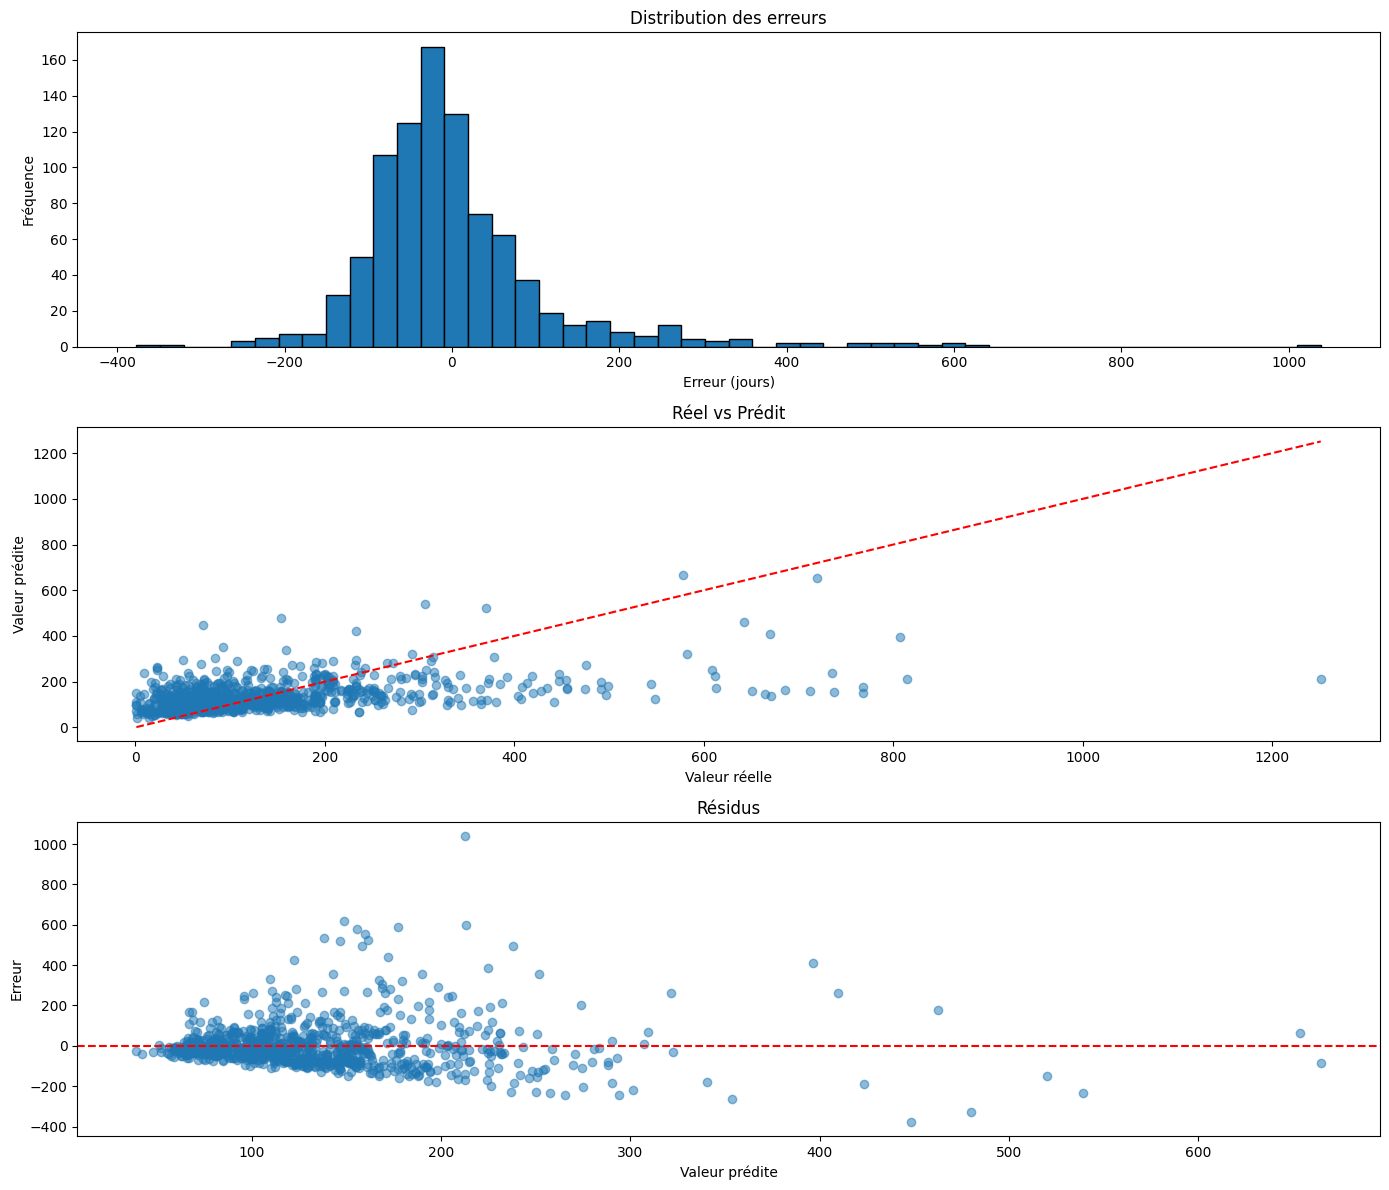

MAE: 75.27 jours
Médiane erreur absolue: 51.59 jours
RMSE: 116.97 jours
R²: 0.198
MAE / Moyenne cible: 54.7%


In [324]:
# 1. Vérifier la distribution des erreurs
import matplotlib.pyplot as plt

errors = y_test - y_pred
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(14, 12))
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes

# plt.subplot(1, 3, 1)
ax1.hist(errors, bins=50, edgecolor='black')
ax1.set_xlabel('Erreur (jours)')
ax1.set_ylabel('Fréquence')
ax1.set_title('Distribution des erreurs')

# plt.subplot(1, 3, 2)
ax2.scatter(y_test, y_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax2.set_xlabel('Valeur réelle')
ax2.set_ylabel('Valeur prédite')
ax2.set_title('Réel vs Prédit')

# plt.subplot(1, 3, 3)
ax3.scatter(y_pred, errors, alpha=0.5)
ax3.axhline(0, color='red', linestyle='--')
ax3.set_xlabel('Valeur prédite')
ax3.set_ylabel('Erreur')
ax3.set_title('Résidus')

plt.tight_layout()
plt.show()

# 2. Métriques additionnelles
from sklearn.metrics import mean_squared_error, median_absolute_error

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} jours")
print(f"Médiane erreur absolue: {median_absolute_error(y_test, y_pred):.2f} jours")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} jours")
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"MAE / Moyenne cible: {mean_absolute_error(y_test, y_pred) / y_test.mean() * 100:.1f}%")

In [325]:
# 1. Tester d'autres modèles
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# XGBoost souvent meilleur
xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")

# 2. Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Meilleurs params: {grid_search.best_params_}")

# 3. Ajouter plus de features engineering
# - Interaction entre features importantes
# - Encoder publisher/developer avec target encoding
# - Ajouter des features temporelles (jours depuis release, saison, etc.)

XGBoost MAE: 75.69
Meilleurs params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
